# Entregable 2: Módulo 5 Estadística - Evaluación de un modelo y su aplicación para predicción. 

### Mariana Castro Payns - A01706038

#### **Objetivo:** Calibrar un modelo ARIMA-SARIMA para la serie del ÍNDICE GLOBAL DE ACTIVIDAD ECONÓMICA DE MÉXICO. Se realizará un proceso de manejo de datos y calibración del modelo para obtener un pronóstico de la economía mexicana en el sexenio actual.

#### *Configuración inicial*

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
# Importar dataset
df = pd.read_csv('Indicadores1.csv')
df

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Unidad de medida,Frecuencia
0,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/08,113.320302,Índice de volumen físico base 2013=100,Mensual
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.268587,Índice de volumen físico base 2013=100,Mensual
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,Índice de volumen físico base 2013=100,Mensual
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,Índice de volumen físico base 2013=100,Mensual
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,Índice de volumen físico base 2013=100,Mensual
...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.612900,Índice de volumen físico base 2013=100,Mensual
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.865984,Índice de volumen físico base 2013=100,Mensual
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.943249,Índice de volumen físico base 2013=100,Mensual
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.022521,Índice de volumen físico base 2013=100,Mensual


In [3]:
# Obtener 
df = df[["Periodo", "Valor"]]
df

,Periodo,Valor
0,2022/08,113.320302
1,2022/07,111.268587
2,2022/06,112.797501
3,2022/05,114.442424
4,2022/04,109.529866
...,...,...
351,1993/05,63.612900
352,1993/04,61.865984
353,1993/03,63.943249
354,1993/02,61.022521


In [4]:
# Rearrenge period
df = df.loc[::-1].reset_index()
df

,index,Periodo,Valor
0,355,1993/01,60.407691
1,354,1993/02,61.022521
2,353,1993/03,63.943249
3,352,1993/04,61.865984
4,351,1993/05,63.612900
...,...,...,...
351,4,2022/04,109.529866
352,3,2022/05,114.442424
353,2,2022/06,112.797501
354,1,2022/07,111.268587


In [5]:
# Drop useless column
df = df.drop(columns='index')
df

,Periodo,Valor
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
351,2022/04,109.529866
352,2022/05,114.442424
353,2022/06,112.797501
354,2022/07,111.268587


#### ***1. Realizar pruebas estadísticas de estacionariedad y decide el tipo de transformación de la variable.***

La estacionariedad se refiere a que las propiedades de la serie no varían con respecto al tiempo. 
Una serie estacionaria Yt tiene las siguientes características:

1. El promedio o valor esperado de la serie es contante en el tiempo. Sin importar en qué periodod se enfoquen, el valor promedio de la serie es aproximadamente el mismo:

    ![Stationary](images/stationary.png)

2. La varianza y desviación estándar de la serie es similar a través del tiempo. Se espera que la varianza sea homogénea para cualquier periodo de tiempo. 
    
    ![Stationary2](images/vardes.png)

3. La covarianza y correlación entre un valor de la serie en t y su mismo valor en un periodo previo de tiempo es el mismo en cualquier periodo de tiempo. 

    ![Stationary3](images/covcorr.png)


<AxesSubplot:xlabel='Periodo', ylabel='Valor'>

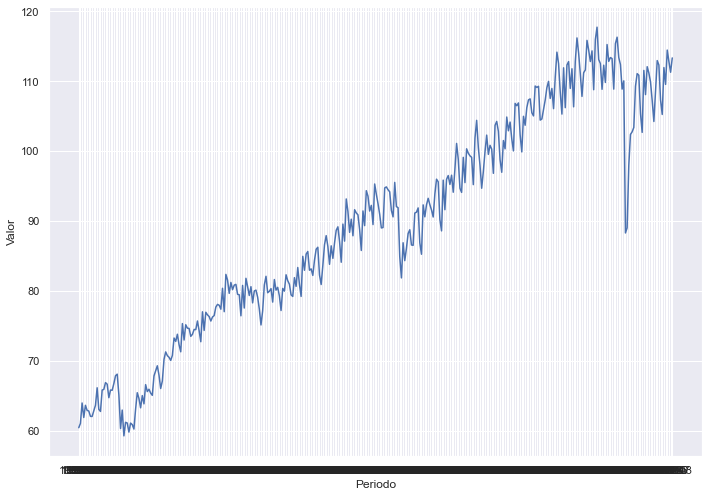

In [6]:
# visualizacion de los datos
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=df, x="Periodo", y="Valor")
plot

##### *Comprobar 1 - El promedio de la serie es constante en el tiempo:*

In [7]:
# Agrupar por promedio y obtener promedio
promedio_periodo = df.groupby(['Periodo']).mean()
promedio_periodo

,Valor
Periodo,
1993/01,60.407691
1993/02,61.022521
1993/03,63.943249
1993/04,61.865984
1993/05,63.612900
...,...
2022/04,109.529866
2022/05,114.442424
2022/06,112.797501


<AxesSubplot:xlabel='Periodo', ylabel='Valor'>

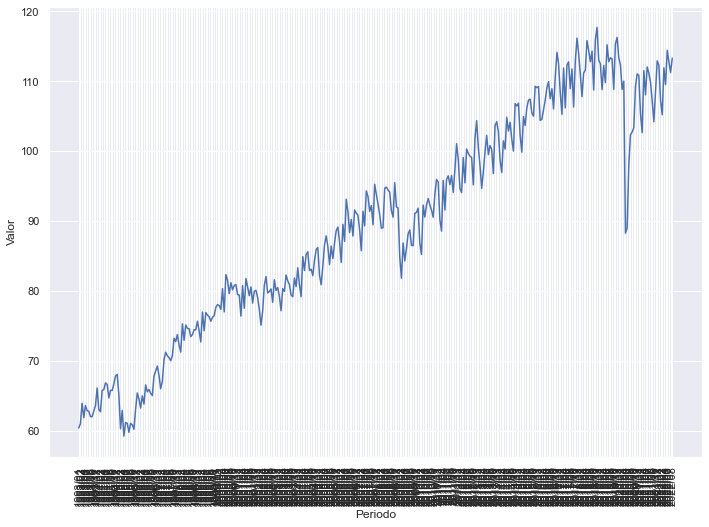

In [8]:
# Visualización de datos por periodo
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=promedio_periodo, x="Periodo", y="Valor")
plt.xticks(rotation = 90)
plot

In [9]:
# Comprobar promedio anualmente
promedio_year = df.groupby(df.Periodo.str[0:4]).mean()
promedio_year

,Valor
Periodo,
1993,62.763073
1994,65.820599
1995,61.684299
1996,65.898989
1997,70.352236
1998,74.003165
1999,76.016915
2000,79.896427
2001,79.489557


<AxesSubplot:xlabel='Periodo', ylabel='Valor'>

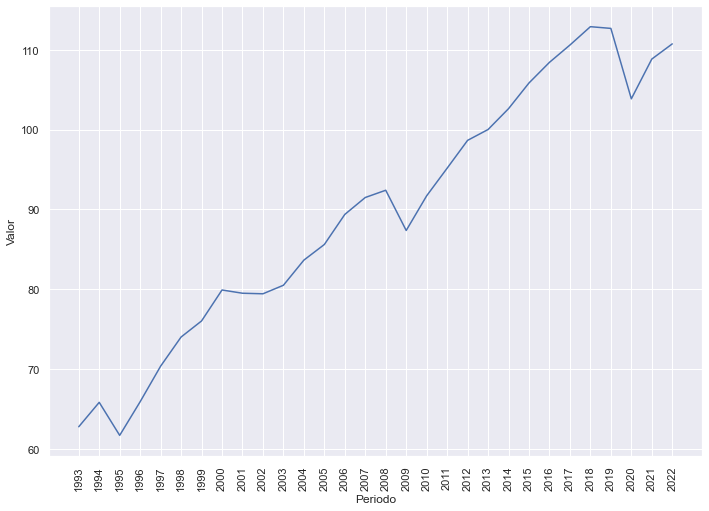

In [10]:
# visualización de los datos anualmente
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=promedio_year, x="Periodo", y="Valor")
plt.xticks(rotation = 90)
plot

HECHO ESTO ES POSIBLE OBSERVAR QUE EL PROMEDIO DE LOS DATOS CAMBIA A TRAVÉS DEL TIEMPO EN PERIODO Y ANUALMENTE, POR LO QUE  A SIMPLE VISTA ES POSIBLE DECIR QUE NO SE TRATA DE UNA SERIE NO ESTACIONARIA, SI LOS EL PROMEDIO FUERA CONSTANTE, ENTONCES SERÍA ESTACIONARIA. SIN EMBARGO SE CORROBORARÁ MAS ADELANTE.

##### *Comprobar 2- La varianza de la serie es constante en el tiempo:*

In [13]:
# Comprobar promedio anualmente
var_year = df.groupby(df.Periodo.str[0:4]).var()
var_year

,Valor
Periodo,
1993,2.238840
1994,2.755399
1995,4.038529
1996,3.412761
1997,5.679828
1998,1.715156
1999,2.380768
2000,2.851454
2001,2.262823


<AxesSubplot:xlabel='Periodo', ylabel='Valor'>

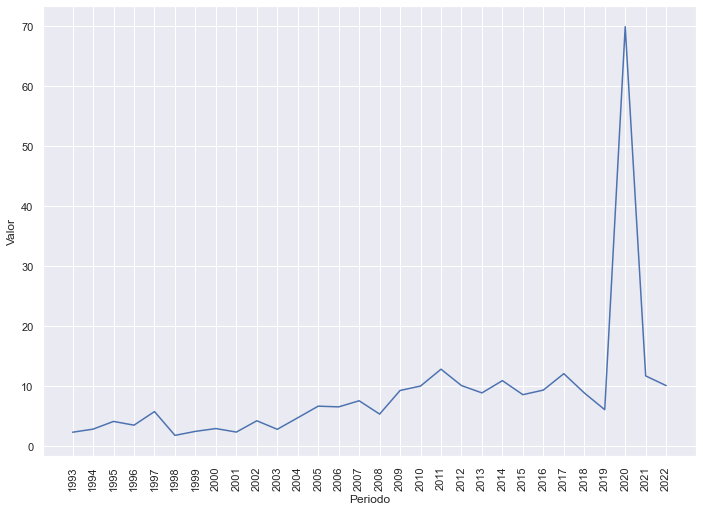

In [14]:
# visualización de los datos anualmente
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=var_year, x="Periodo", y="Valor")
plt.xticks(rotation = 90)
plot

AQUÍ ES POSIBLE VISUALIZAR QUE LA VARIANZA NO SE MANTIENE HOMOGÉNEA EN PERIODOS DE TIEMPO, POR LO CUAL PODEMOS DECIR QUE A SIMPLE VISTA LA SERIE NO ES ESTACIONARIA.

AHORA SE REALIZARÁN PRUEBAS DE ESTACIONARIEDAD PARA COMPROBAR QUE LA SERIE SEA ESTACIONARIA O NO. 

#### **Pruebas de estacionariedad**

In [15]:
# Calculo de logaritmo
df['LOG Valor'] = np.log(df['Valor'])
df

,Periodo,Valor,LOG Valor
0,1993/01,60.407691,4.101116
1,1993/02,61.022521,4.111243
2,1993/03,63.943249,4.157996
3,1993/04,61.865984,4.124970
4,1993/05,63.612900,4.152816
...,...,...,...
351,2022/04,109.529866,4.696197
352,2022/05,114.442424,4.740072
353,2022/06,112.797501,4.725594
354,2022/07,111.268587,4.711947


In [16]:
# Calculo diferencia anual 
df['CC Anual'] = df['LOG Valor'] - df['LOG Valor'].shift(12)
df

,Periodo,Valor,LOG Valor,CC Anual
0,1993/01,60.407691,4.101116,NaN
1,1993/02,61.022521,4.111243,NaN
2,1993/03,63.943249,4.157996,NaN
3,1993/04,61.865984,4.124970,NaN
4,1993/05,63.612900,4.152816,NaN
...,...,...,...,...
351,2022/04,109.529866,4.696197,0.013414
352,2022/05,114.442424,4.740072,0.021001
353,2022/06,112.797501,4.725594,0.014522
354,2022/07,111.268587,4.711947,0.012578


<AxesSubplot:xlabel='Periodo', ylabel='LOG Valor'>

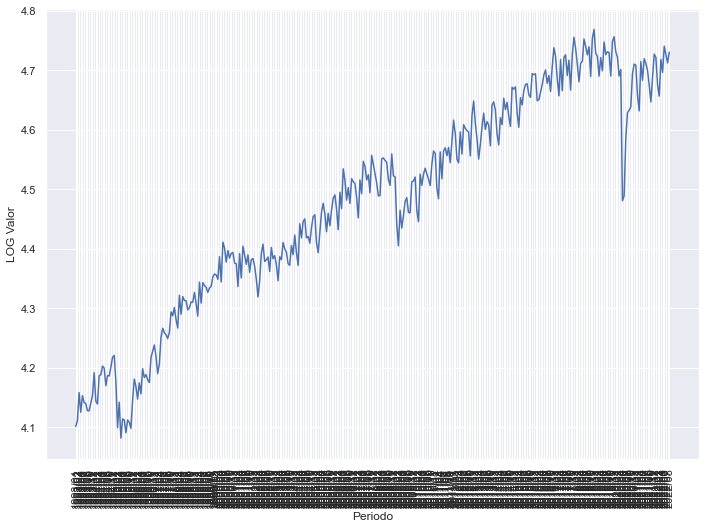

In [17]:
# visualización de los datos log
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=df, x="Periodo", y="LOG Valor")
plt.xticks(rotation = 90)
plot

<AxesSubplot:xlabel='Periodo', ylabel='CC Anual'>

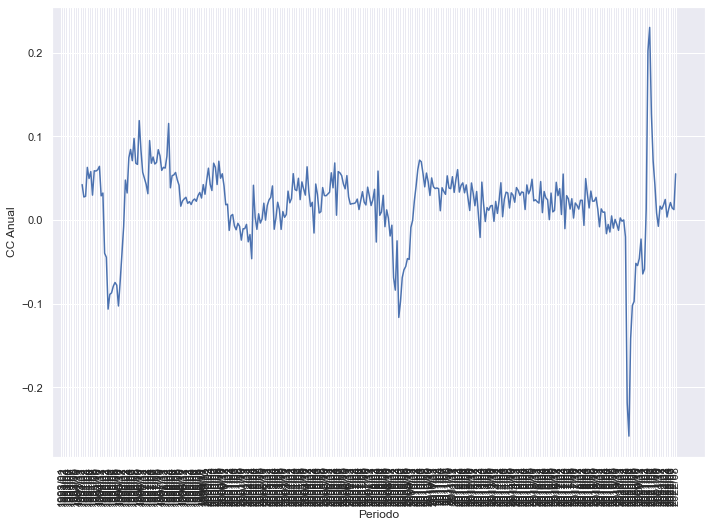

In [18]:
# visualización de datos CC
plot = sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.lineplot(data=df, x="Periodo", y="CC Anual")
plt.xticks(rotation = 90)
plot

In [19]:
# Eliminar NAN y inf
df = df.dropna()
df

,Periodo,Valor,LOG Valor,CC Anual
12,1994/01,63.029268,4.143599,0.042483
13,1994/02,62.733156,4.138890,0.027647
14,1994/03,65.790275,4.186472,0.028476
15,1994/04,65.891716,4.188013,0.063042
16,1994/05,66.858802,4.202583,0.049767
...,...,...,...,...
351,2022/04,109.529866,4.696197,0.013414
352,2022/05,114.442424,4.740072,0.021001
353,2022/06,112.797501,4.725594,0.014522
354,2022/07,111.268587,4.711947,0.012578


In [20]:
df = df.reset_index(drop=True)
df

,Periodo,Valor,LOG Valor,CC Anual
0,1994/01,63.029268,4.143599,0.042483
1,1994/02,62.733156,4.138890,0.027647
2,1994/03,65.790275,4.186472,0.028476
3,1994/04,65.891716,4.188013,0.063042
4,1994/05,66.858802,4.202583,0.049767
...,...,...,...,...
339,2022/04,109.529866,4.696197,0.013414
340,2022/05,114.442424,4.740072,0.021001
341,2022/06,112.797501,4.725594,0.014522
342,2022/07,111.268587,4.711947,0.012578


In [21]:
# Dicky-Fuller Test Aumentada
dicky_fuller = adfuller(df['CC Anual'])

In [22]:
# Impresion de resultados de Dicky-Fuller Test
print('ADF Estadistica: %f' % dicky_fuller[0])
print('p-value: %f' % dicky_fuller[1])
print('Valores críticos:')

for key, value in dicky_fuller[4].items():
    print('\t%s: %.3f' % (key, value))
if dicky_fuller[0] < dicky_fuller[4]["5%"]:
    print ("Rechazo de HO - Serie de Tiempo es Estacionaria")
else:
    print ("Fallo en Rechazo de HO -  Serie de Tiempo NO es Estacionaria")

ADF Estadistica: -3.772664
p-value: 0.003200
Valores críticos:
	1%: -3.451
	5%: -2.870
	10%: -2.572
Rechazo de HO - Serie de Tiempo es Estacionaria


PRIMERAMENTE PODEMOS VER EL VALOR ADF, ENTRE MÁS NEGATIVO SEA EL ADF ESTADÍSTICO MAYOR ES LA PROBABILIDAD DE RECHAZAR LA HIPÓTESIS NULA, DADO QUE DA UN VALOR DE -3.77, PODEMOS DECIR QUE HAY UNA ALTA PROBABILIDAD DEL RECHAZO DE LA H0. EL TEST DE DICKY FULLER ARROJA RESULTADOS QUE INDICAN QUE LA SERIE ES ESTACIONATIA. DADO QUE EL P-VALUE NOS INDICA LA PROBALIDAD DE QUE LA HIPÓTESIS NULA SEA CORRECTA, Y EN ESTE CASO ES CASI 0, LO QUE SIGNIFICA QUE LA PROBABILIDAD DE QUE LA SERIE SEA NO ESTACIONARIA ES 0. INDICANDO ASÍ QUE LA SERIE DE TIEMPO ES ESTACIONARIA. 

#### ***2. Calibrar un modelo ARIMA-SARIMA basado en pruebas y gráficos de autocorrelaciones.***

##### 2.1 Gráficos de autocorrelaciones AC y PAC

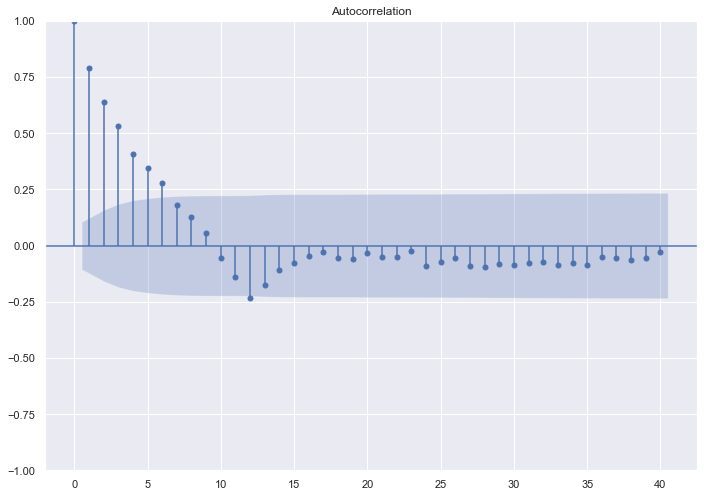

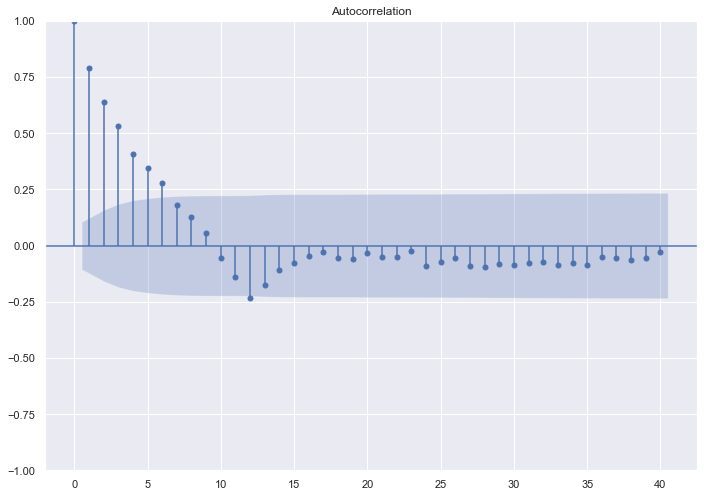

In [23]:
sm.graphics.tsa.plot_acf(df['CC Anual'].squeeze(), lags=40)  

**INTERPRETACIÓN ACF PLOT**

EL PLOT ACF (ACTOCORRELATION FUNCTION) MUESTRA LA CORRELACIÓN ENTRE LA SERIE DE TIEMPO Y SUS MISMOS VALORES RETRASADOS. EN OTRAS PALABRAS, EXPLICA COMO EL VALOR PRESENTE DE UNA SERIE DE TIEMPO ESTA CORRELACIONADA CON EL PASADO EN (1 UNIDAD AL PASADO, 2 UNIDADES, N-UNIDADES PASADAS). 
EL EJE X REPRESENTA EL NUMERO DE LAGS Y EL EJE Y REPRESENTA EL COEFICIENTE DE CORRELACION. 
LA PARTE SOMBREADA INDICA EL INTERVALO DE CONFIANZA DE LAS AUTOCRRELACIONES, ASÍ QUE, PARA ESTE CASO LAS LÍNEAS DE LOS INTÉRVALOS 0-6 APROXIMADAMENTE TIENEN AUTOCORRELACIONS MAYORES A 0, DEBIDO A QUE SON LAS MÁS ALEJADAS DE DICHA LÍNEA SOMBREADA. 

c:\Users\maria\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


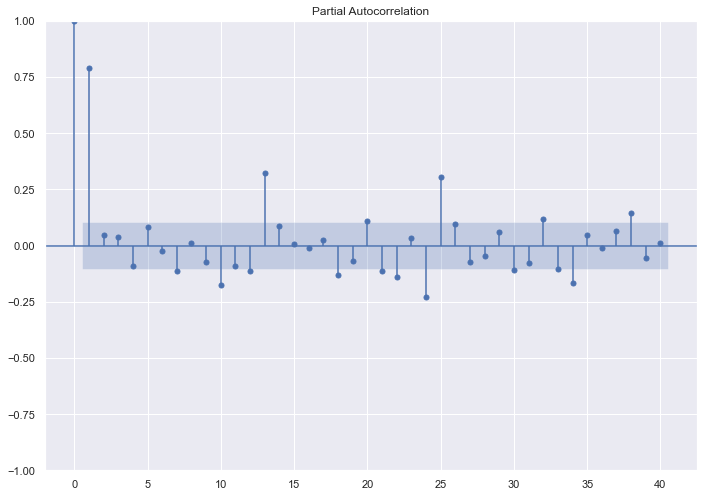

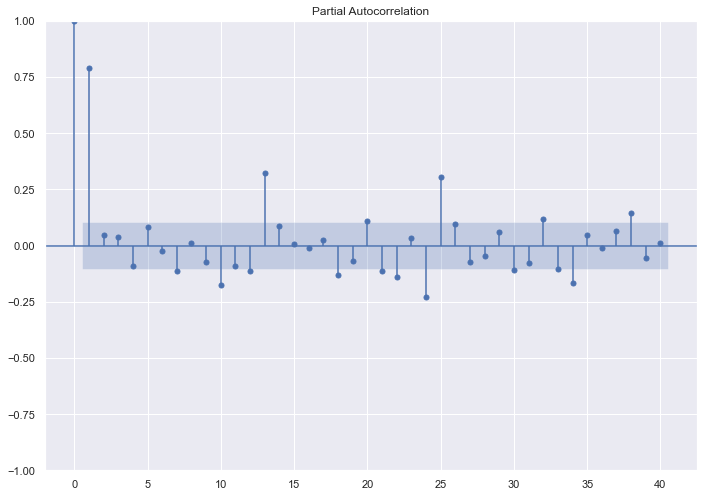

In [24]:
sm.graphics.tsa.plot_pacf(df['CC Anual'].squeeze(), lags=40)  


**INTERPRETACIÓN PACF PLOT**

EL PLOT PACF (PARTIAL AUTOCORRELATION FUNCTION) EXPLICA LA CORRELACIÓN PARCIAN ENTRE LA SERIE Y SUS LAGS. EN OTROS TÉRMINOS SIMPLES, PACF PUEDE SER EXPLICADA USADA UNA REGRESIÓN LINEAL DONDE SE REALIZA UNA PREDICCION Y(T) DESDE Y(T-1), Y(T-2) Y Y(T-3) EN ESTE CASI SE CORREALACIONAN PARTES DE Y(T) Y DE Y(T-3) QUE NO SON PREDECIDAS POR Y(T-1) Y Y(T-2). 

**MODELADO**

PARA EL MODELO SE SE IMPLEMENTARÁ UN MODELO SARIMA (SEASONAL ARIMA MODEL).

***ELECCIÓN DE PARAMETROS DEL MODELO:***

PRIMERAMENTE SE DETERMINARÁ EL PARÁMETRO *D* (SEASONAL DIFERENCES), ESTE SE DETERMINARÁ CON LAS PRUEBAS DEL DICKEY-FULLER TEST AUMENTADA, ESTA PRUEBA INDICÓ QUE LA SERIE ES ESTACIONARIA, POR LO TANTO *D=1* Y *d=0.*

SEGUIDO DE ESTO SE ESTABLECERÁ EL PARÁMETRO *p* (AUTOREGRESSIVE ORDER MODEL). ESTE ES POSIBLE DETERMINARLO CON EL GRÁFICO PACF, DEBIDO QUE EL PRIMER RETRASO ES EL MÁS SIGNIFICATIVO, CONSIDERAMOS *P=1* Y *P=0.*

FINALMENTE, SE ESTABLECE LA *q*, OBSERVANDO LA GRÁFICA ACF. AL OBSERVAR LA CANTIDAD DE RETRASOS QUE CRUZAN EL INTERVALO DE CONFIANZA, ES POSIBLE ESTABLEBER UN *q=2*, DADO QUE ES POSIBLE OBSERVAR UN PATRON DE ESTACIONARIEDAD DETERMINAMOS *Q=1*

POR LO TANTO TENEMOS:

SARIMA(p = 1, d = 0, q = 2)(P = 0, D = 1, Q = 1, s =  12)


In [25]:
df_model = df[["LOG Valor","Periodo"]]
df_model

,LOG Valor,Periodo
0,4.143599,1994/01
1,4.138890,1994/02
2,4.186472,1994/03
3,4.188013,1994/04
4,4.202583,1994/05
...,...,...
339,4.696197,2022/04
340,4.740072,2022/05
341,4.725594,2022/06
342,4.711947,2022/07


In [26]:
df_model = df_model.set_index("Periodo")
df_model

,LOG Valor
Periodo,
1994/01,4.143599
1994/02,4.138890
1994/03,4.186472
1994/04,4.188013
1994/05,4.202583
...,...
2022/04,4.696197
2022/05,4.740072
2022/06,4.725594


In [27]:
SARIMA = sm.tsa.statespace.SARIMAX(df_model['LOG Valor'], oder=(1,0,2), seasonal_order=(0,1,1,12))
result = SARIMA.fit()
result.summary()

c:\Users\maria\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            LOG Valor   No. Observations:                  344
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 768.520
Date:                              Thu, 24 Nov 2022   AIC                          -1531.040
Time:                                      02:16:03   BIC                          -1519.625
Sample:                                  01-01-1994   HQIC                         -1526.488
                                       - 08-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9813      0.013     72.938      0.000       0.955       1.008
ma.S.L12      -0.8396      0.046    -18.187      0.000      -0.930      -0.749
sigma2         0.0005   1.43e-05     38.064      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.74   Jarque-Bera (JB):              5313.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ***3. Interpretación de coeficintes y su significacia estadística del modelo calibrado.***

EL COEFICIENTE *ar.L1* INDICA QUE EL PORCENTAJE DE CRECIMIENTO ANUAL DEL *GLOBAL INDEX OF ECONOMY ACTIVITY* ES POSITIVO Y ALTAMENTE SIGNIFICATIVO, CON UN VALOR DE 98.13%. 

EL COEFICIENTE *ma.S.L12* ES NEGATIVO Y NO SIGNIFICATIVO (-89.96), INDICANDO UN PROCENTAJE DE CRECIEMITNO ANUAL DEL INDICE ES NEGATIVO RELACIONADO AL PORCENTAJE ANUAL DEL AÑO ANTERIOR. 

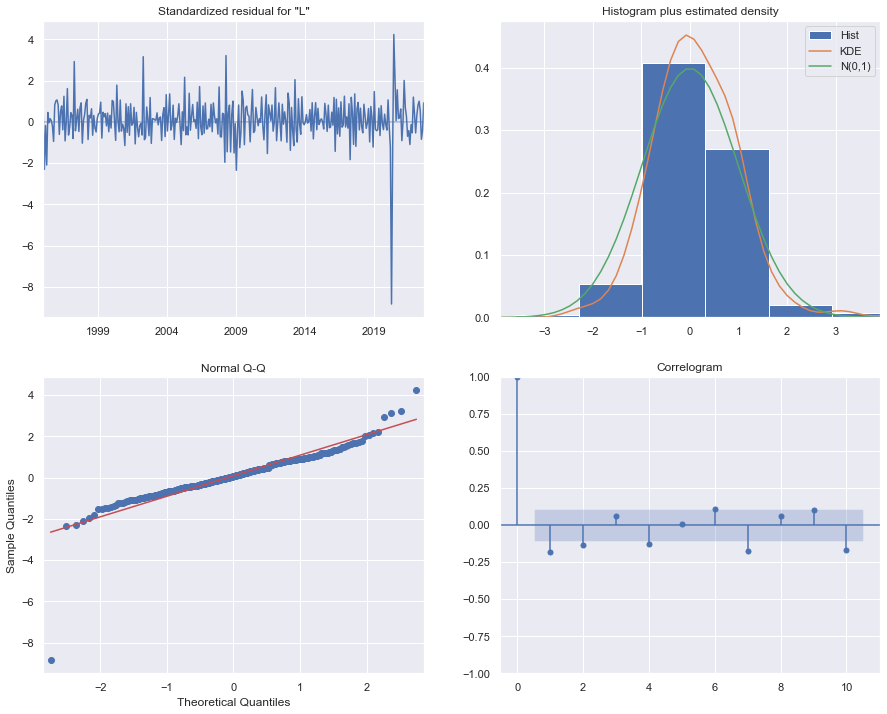

In [28]:
result.plot_diagnostics(figsize=(15,12));

DEL GRÁFICO NORMAL Q-Q, PODEMOS VER QUE CASI TENEMOS UNA LÍNEA RECTA, LO QUE SUGIERE QUE NO HAY UNA DESVIACIÓN DE LA NORMALIDAD. POR OTRO LADO, EL CORRELOGRAMA SUGIERE QUE NO HAY AUTOCORRELACIÓN EN LOS RESIDUOS, POR LO QUE SON RUIDO BLANCO.

#### ***4. Predicción de la variable utilizando el modelo calibrado.***

In [29]:
forecast = result.predict(start=df.shape[0], end=df.shape[0] + 12)

In [30]:
# Eliminar log
forecast = np.exp(forecast)
forecast.reset_index(drop=True, inplace=True)
forecast

0     110.331890
1     115.892592
2     117.723159
3     116.102365
4     112.015463
5     109.142322
6     114.212508
7     109.541074
8     113.245601
9     113.501793
10    112.889567
11    112.886002
12    109.916935
Name: predicted_mean, dtype: float64

In [31]:
df_forecast = df['Valor']

In [32]:
df_forecast = df_forecast.append(forecast, ignore_index=True)
df_forecast

C:\Users\maria\AppData\Local\Temp\ipykernel_8944\72053521.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecast = df_forecast.append(forecast, ignore_index=True)


0       63.029268
1       62.733156
2       65.790275
3       65.891716
4       66.858802
          ...    
352    113.245601
353    113.501793
354    112.889567
355    112.886002
356    109.916935
Length: 357, dtype: float64

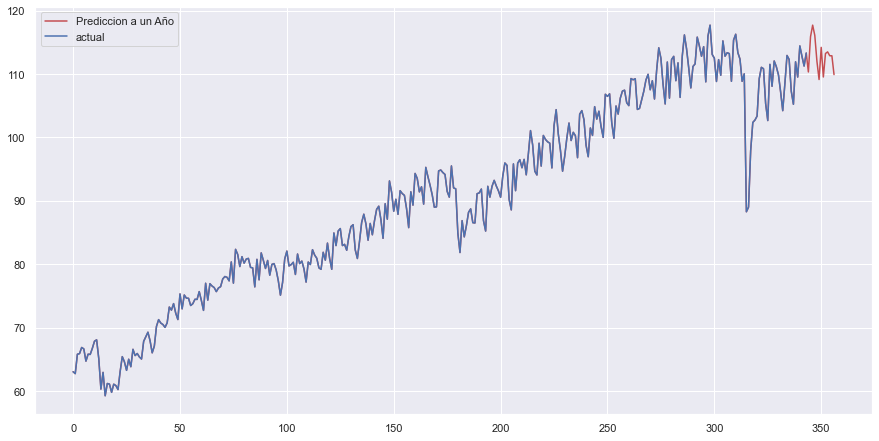

In [33]:
plt.figure(figsize=(15, 7.5))
plt.plot(df_forecast, color='r', label='Prediccion a un Año')
plt.plot(df["Valor"], label='actual')
plt.legend()
plt.show()

In [34]:
forecast1 = result.predict(start=df.shape[0], end=df.shape[0] + 24)

In [35]:
# Eliminar log
forecast1 = np.exp(forecast1)
forecast1.reset_index(drop=True, inplace=True)
forecast1

0     110.331890
1     115.892592
2     117.723159
3     116.102365
4     112.015463
5     109.142322
6     114.212508
7     109.541074
8     113.245601
9     113.501793
10    112.889567
11    112.886002
12    109.916935
13    115.464858
14    117.296777
15    115.689702
16    111.624757
17    108.768743
18    113.828872
19    109.179997
20    112.879280
21    113.141498
22    112.537905
23    112.540916
24    109.587198
Name: predicted_mean, dtype: float64

In [36]:
df_forecast1 = df['Valor']

In [37]:
df_forecast1 = df_forecast1.append(forecast1, ignore_index=True)
df_forecast1

C:\Users\maria\AppData\Local\Temp\ipykernel_8944\1809516138.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_forecast1 = df_forecast1.append(forecast1, ignore_index=True)


0       63.029268
1       62.733156
2       65.790275
3       65.891716
4       66.858802
          ...    
364    112.879280
365    113.141498
366    112.537905
367    112.540916
368    109.587198
Length: 369, dtype: float64

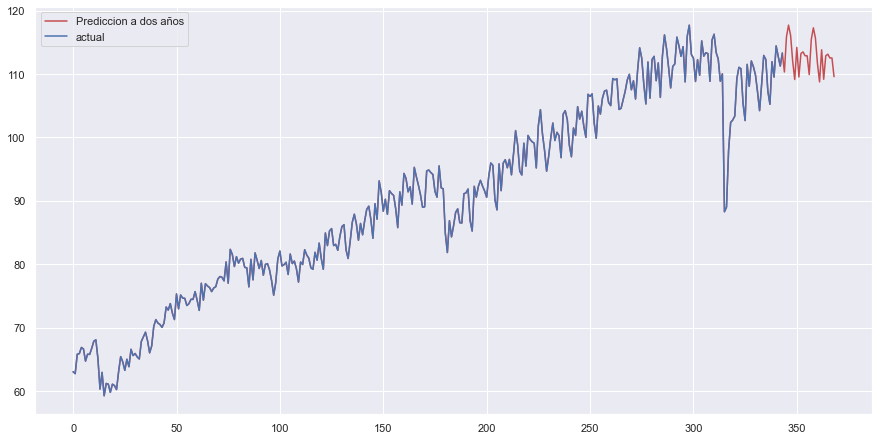

In [38]:
plt.figure(figsize=(15, 7.5))
plt.plot(df_forecast1, color='r', label='Prediccion a dos años')
plt.plot(df["Valor"], label='actual')
plt.legend()
plt.show()